<a href="https://colab.research.google.com/github/NiravSoni3619/LINEAR-REGRESSION-PROJECT/blob/main/CMSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Assuming you are uploading a CSV file, get the file key
file_key = list(uploaded.keys())[0]

# Step 3: Read the data into a pandas DataFrame
df = pd.read_csv(file_key)

# Step 4: Display the first few rows of the DataFrame
df.head(10)


Saving counterfeit_train.csv to counterfeit_train (1).csv


,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
5,JDG81,8.775,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464
6,KPX48,18.000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938
7,CYW14,7.680,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340
8,TVF57,18.550,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292
9,MGU75,9.510,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840


In [ ]:
print("\nDataFrame Info:")
print(df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB
None

Descriptive Statistics:
       Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
coun

In [ ]:
# filling the missing values in the data
import numpy as np

# Calculate the mean, median, and standard deviation for 'Counterfeit_Weight'
mean_weight = df['Counterfeit_Weight'].mean()
median_weight = df['Counterfeit_Weight'].median()
std_weight = df['Counterfeit_Weight'].std()

# Set the percentage values for filling missing values
mean_percentage = 0.4
median_percentage = 0.3
std_percentage = 0.3

# Calculate the weighted value to fill missing values
weighted_value = (mean_percentage * mean_weight) + (median_percentage * median_weight) + (std_percentage * std_weight)

# Fill missing values in 'Counterfeit_Weight' with the calculated weighted value
df['Counterfeit_Weight'].fillna(weighted_value, inplace=True)


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
count         6818.000000   6818.000000   6818.000000          6818.000000   
mean            13.613267   1995.836316    151.401518             0.079174   
std              4.375187      8.368979     62.203961             0.051481   
min              5.855000   1983.000000     41.790000             0.013000   
25%             10.600000   1985.000000    104.509400             0.040058   
50%             12.195000   1997.000000    153.195700             0.066955   
75%             17.300000   2002.000000    196.148350             0.107697   
max             22.650000   2007.000000    277.188400             0.341391   

       Counterfeit_Sales  
count        6818.000000  
mean         2280.583480  
std          1693.354404  
min           146.290000  
25%           933.265600  
50%          1902.670400  
75%          3207.638400  
max         13199.964800  


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level'], drop_first=True)


In [ ]:
df_encoded.head(10)

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,RRA15,13.100000,1995,160.2366,0.070422,1775.5026,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,YVV26,11.180923,1983,110.4384,0.013000,3069.1520,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,LJC15,9.025000,1995,259.4092,0.060783,2603.0920,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,GWC40,11.800000,1995,99.9830,0.065555,1101.7130,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,QMN13,11.180923,1983,56.4402,0.248859,158.9402,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,JDG81,8.775000,2000,165.5656,0.088881,3047.8464,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
6,KPX48,18.000000,2007,156.9102,0.051685,2883.3938,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
7,CYW14,7.680000,1985,154.3470,0.028150,3262.2340,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
8,TVF57,18.550000,1995,107.3068,0.060266,1959.9292,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,MGU75,9.510000,1985,161.1392,0.023755,3095.7840,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0


<ipython-input-80-117e735353eb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


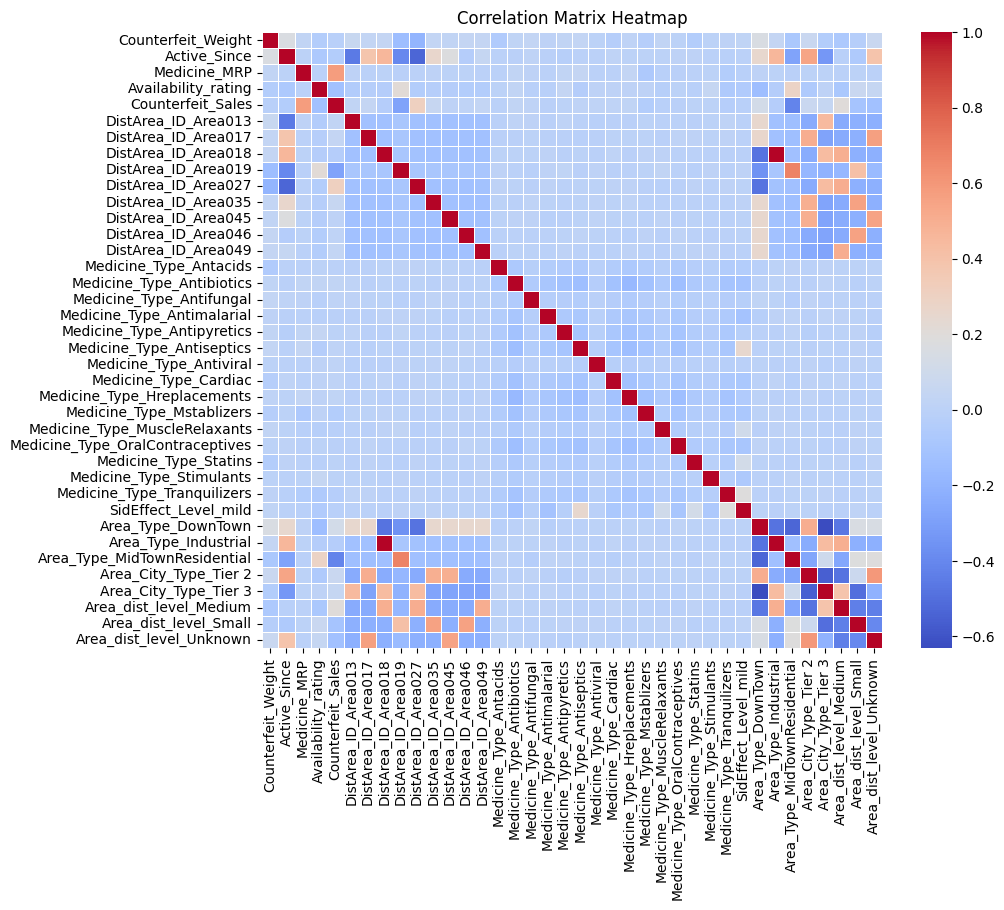

In [ ]:
# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
df_encoded.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating', 'Counterfeit_Sales', 'DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild', 'Area_Type_DownTown', 'Area_Type_Industrial',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 2',
       'Area_City_

In [ ]:
# removing highly co related columns
columns_to_drop = ['Area_Type_Industrial', 'Area_Type_DownTown']  # List the columns you want to drop
df_filtered = df_encoded.drop(columns=columns_to_drop, axis=1)


<ipython-input-83-6c8581dfe2d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


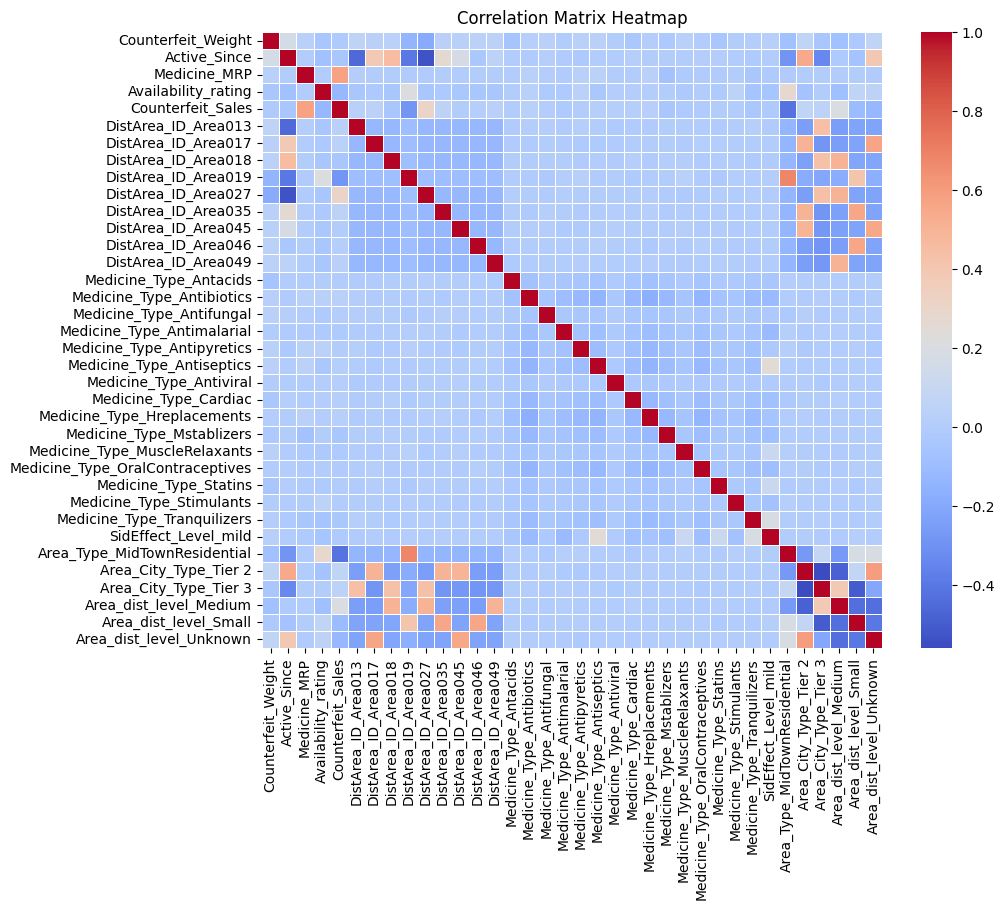

In [ ]:
# revisualising the corelation after removing 'Area_Type_Industrial' column
correlation_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating', 'Counterfeit_Sales'],
      dtype='object')


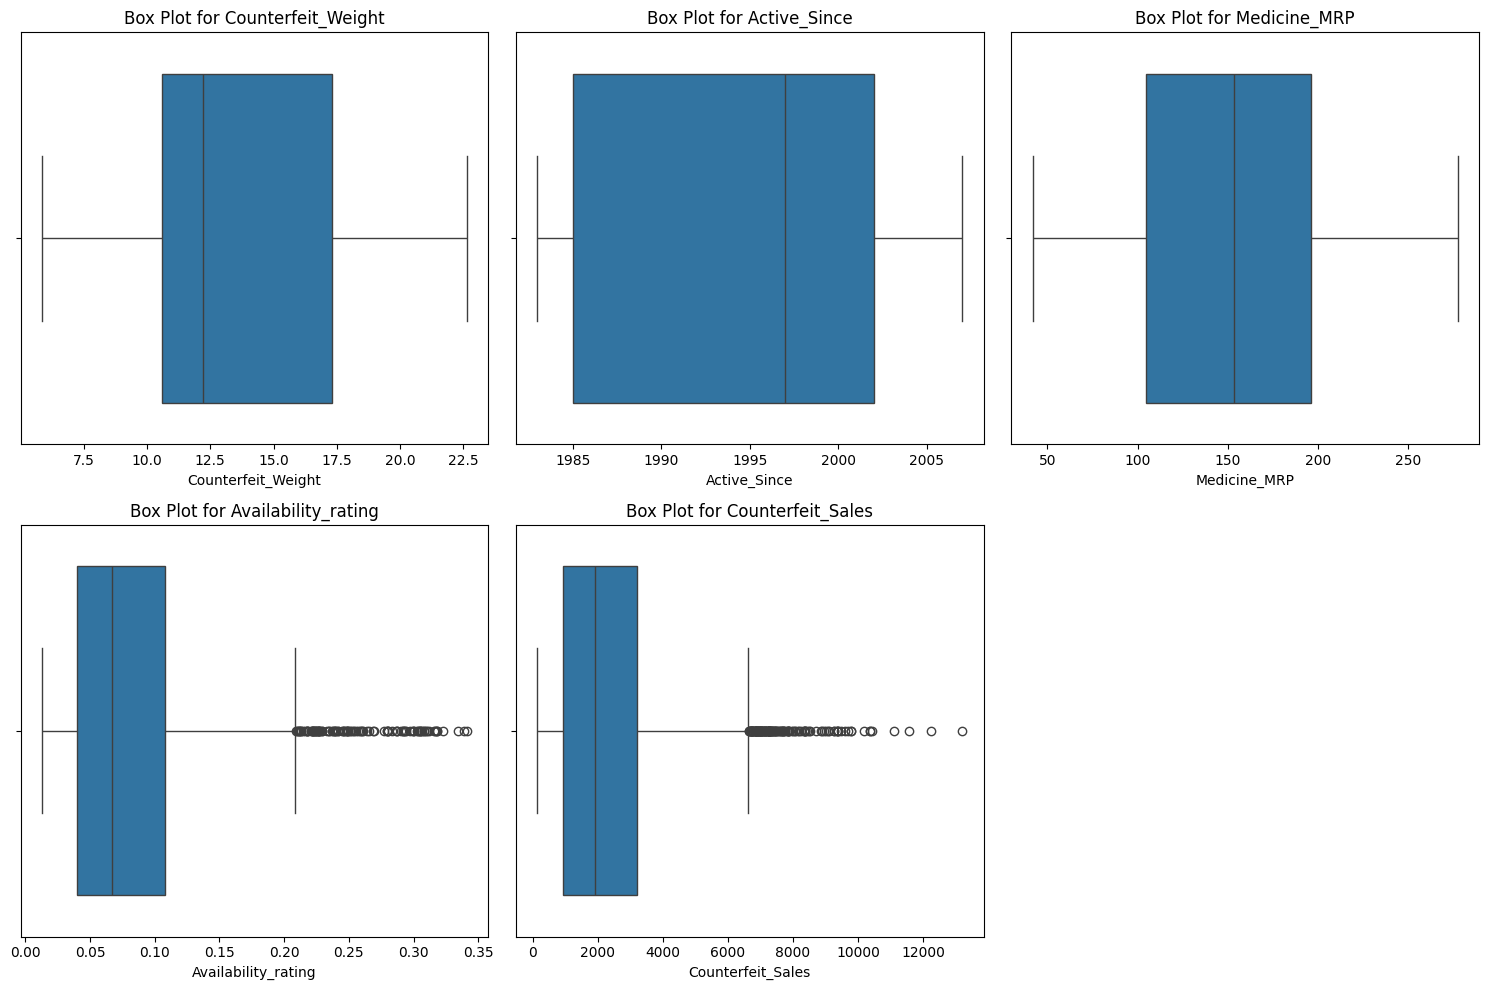

In [ ]:
# cretaing boxplot for identifying outliers


# Select numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)
# Create box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_filtered[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming df_filtered is your DataFrame
columns_with_outliers = ['Availability_rating', 'Counterfeit_Sales']

def remove_outliers(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.4*IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

# Remove outliers from specified columns
df_filtered_no_outliers = remove_outliers(df_filtered, columns_with_outliers)

# Display the shape before and after removing outliers
print("Shape before removing outliers:", df_filtered.shape)
print("Shape after removing outliers:", df_filtered_no_outliers.shape)



Shape before removing outliers: (6818, 37)
Shape after removing outliers: (6525, 37)


Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating', 'Counterfeit_Sales'],
      dtype='object')


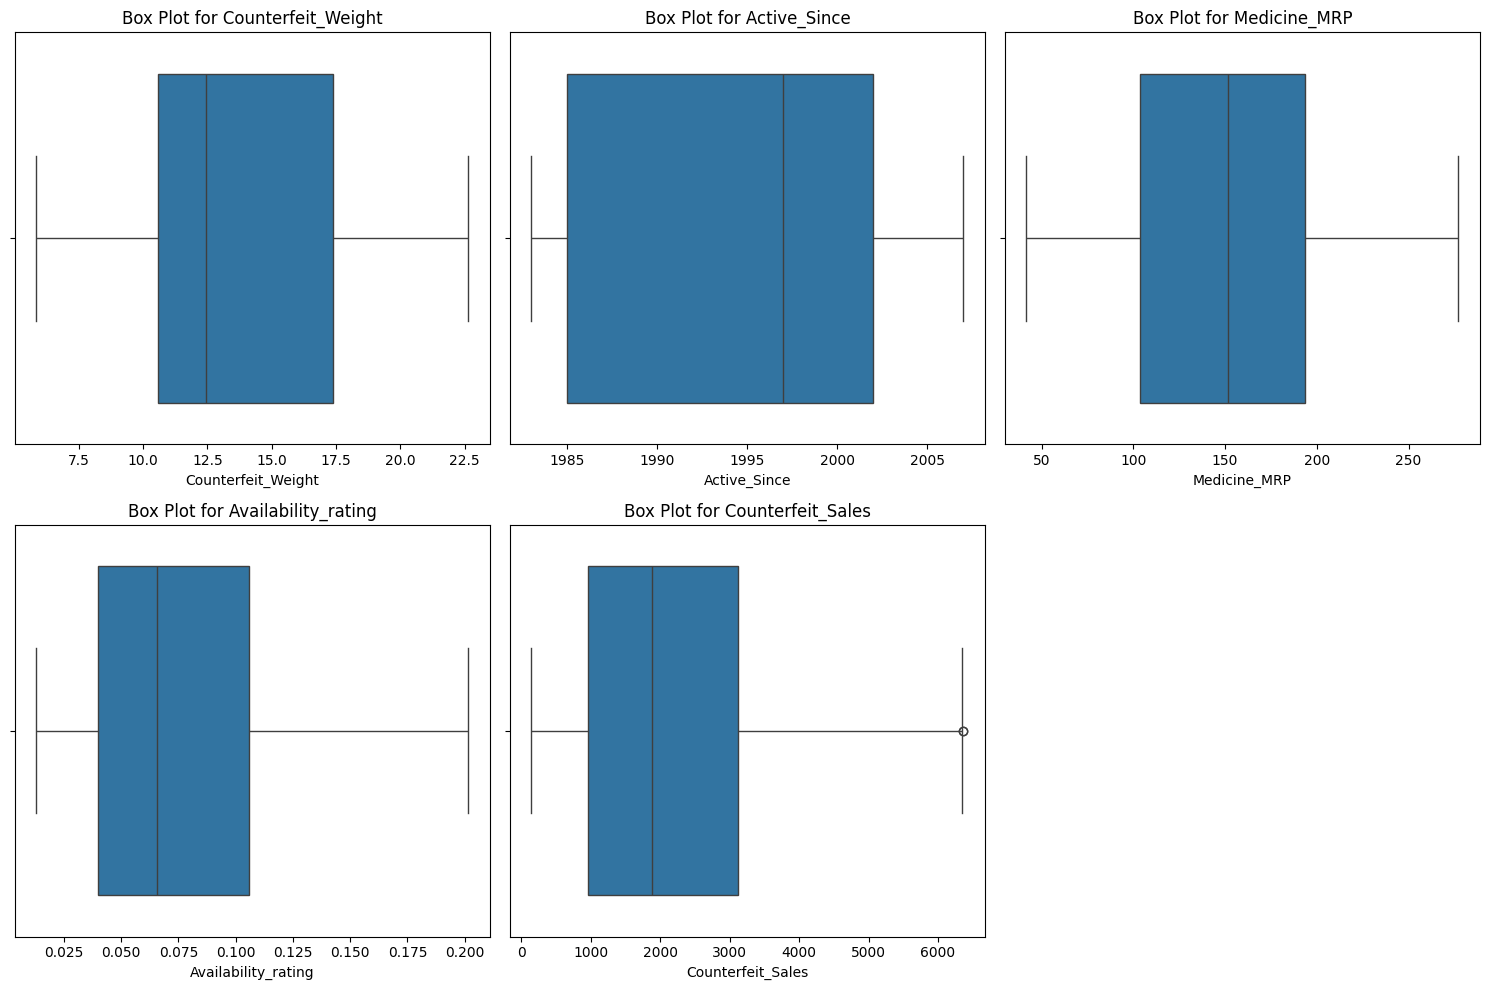

In [ ]:
numerical_columns = df_filtered_no_outliers.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)
# Create box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):

    plt.subplot(2, 3, i)
    sns.boxplot(x=df_filtered_no_outliers[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
print(df_filtered_no_outliers.columns)

Index(['Medicine_ID', 'Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating', 'Counterfeit_Sales', 'DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild', 'Area_Type_MidTownResidential',
       'Area_City_Type_Tier 2', 'Area_City_Type_Tier 3',
       'Area_dist_level_Medium', 'Area_

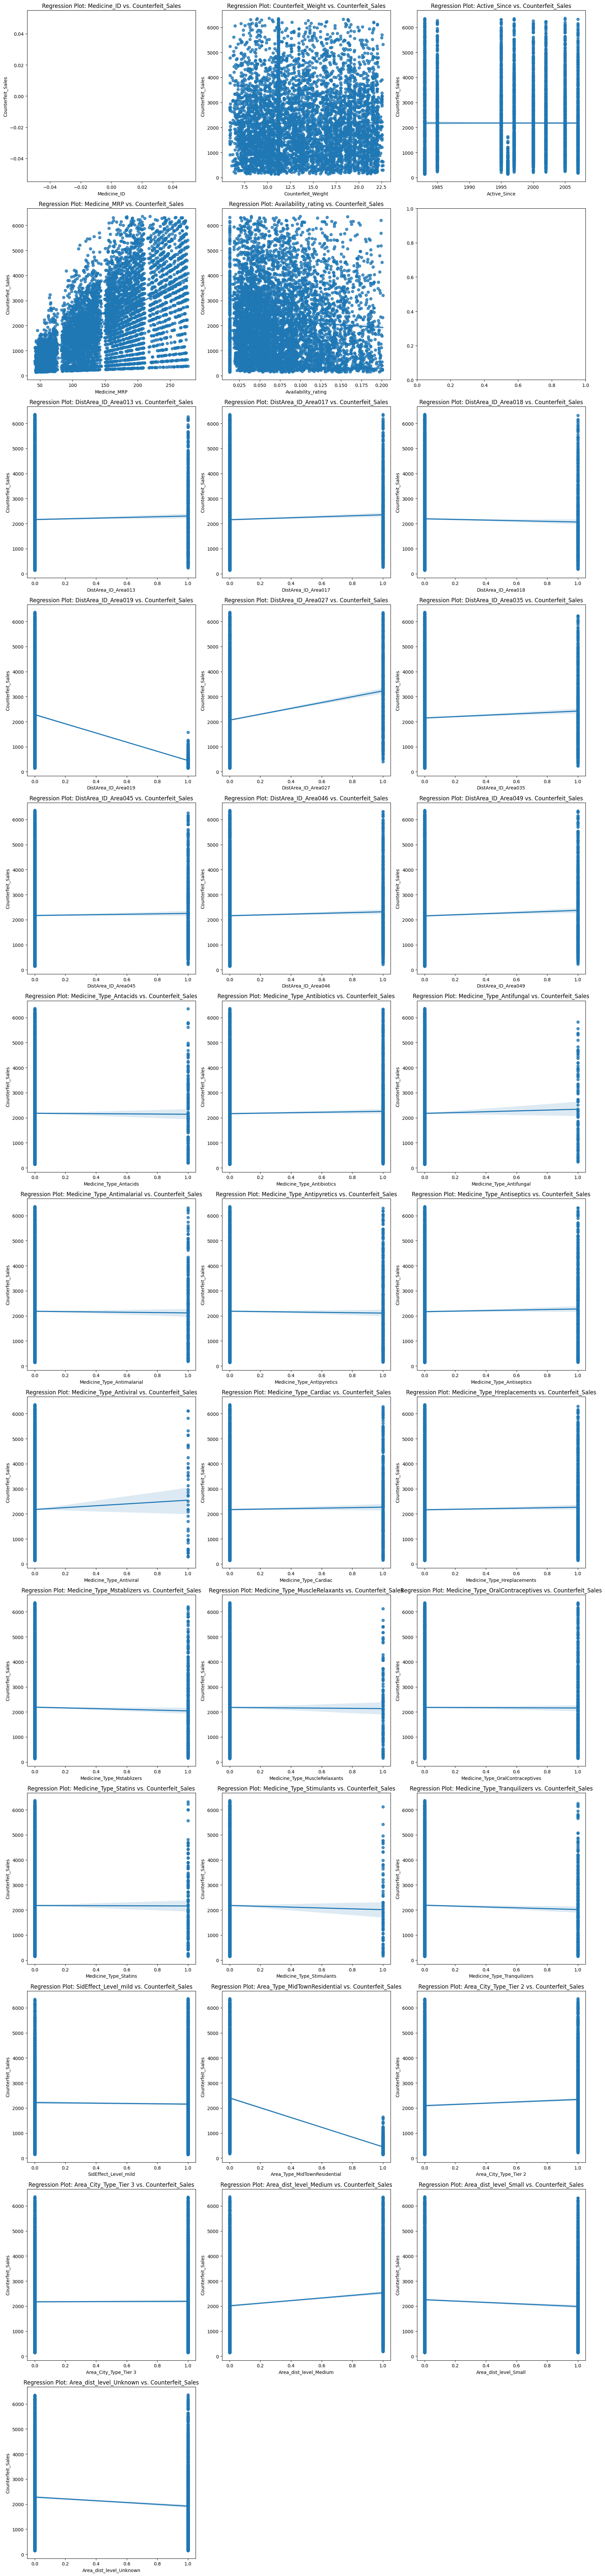

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered_no_outliers is your DataFrame
target_column = 'Counterfeit_Sales'


# Convert columns to numeric types
df_filtered_no_outliers = df_filtered_no_outliers.apply(pd.to_numeric, errors='coerce')

# Get the number of rows and columns for the grid
num_columns = 3
num_rows = (len(df_filtered_no_outliers.columns) - 1) // num_columns + 1

# Set the size of each plot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, 6 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot scatter plots with regression lines
for i, column in enumerate(df_filtered_no_outliers.columns):
    if column != target_column:  # Avoid plotting against itself
        sns.regplot(x=df_filtered_no_outliers[column], y=df_filtered_no_outliers[target_column], ax=axes[i])
        axes[i].set_title(f'Regression Plot: {column} vs. {target_column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_column)

# Remove empty subplots
for i in range(len(df_filtered_no_outliers.columns), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Specify the columns to keep
columns_to_keep = ['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating', 'Counterfeit_Sales','DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 2',
       'Area_City_Type_Tier 3', 'Area_dist_level_Medium',
       'Area_dist_level_Small', 'Area_dist_level_Unknown']

# Keep only the specified columns
df_filtered_selected = df_filtered_no_outliers[columns_to_keep].copy()

# Display the first few rows of the resulting DataFrame
print(df_filtered_selected.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0           13.100000          1995      160.2366             0.070422   
1           11.180923          1983      110.4384             0.013000   
2            9.025000          1995      259.4092             0.060783   
3           11.800000          1995       99.9830             0.065555   
5            8.775000          2000      165.5656             0.088881   

   Counterfeit_Sales  DistArea_ID_Area013  DistArea_ID_Area017  \
0          1775.5026                    0                    0   
1          3069.1520                    0                    0   
2          2603.0920                    0                    0   
3          1101.7130                    0                    0   
5          3047.8464                    0                    0   

   DistArea_ID_Area018  DistArea_ID_Area019  DistArea_ID_Area027  ...  \
0                    0                    0                    0  ...   
1           

In [ ]:
# performing feature engineering

In [ ]:
df_filtered_selected['Age'] = 2024 - df_filtered_selected['Active_Since']
print(df_filtered_selected.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0           13.100000          1995      160.2366             0.070422   
1           11.180923          1983      110.4384             0.013000   
2            9.025000          1995      259.4092             0.060783   
3           11.800000          1995       99.9830             0.065555   
5            8.775000          2000      165.5656             0.088881   

   Counterfeit_Sales  DistArea_ID_Area013  DistArea_ID_Area017  \
0          1775.5026                    0                    0   
1          3069.1520                    0                    0   
2          2603.0920                    0                    0   
3          1101.7130                    0                    0   
5          3047.8464                    0                    0   

   DistArea_ID_Area018  DistArea_ID_Area019  DistArea_ID_Area027  ...  \
0                    0                    0                    0  ...   
1           

In [ ]:
df_filtered_selected['Product'] = df_filtered_selected['Counterfeit_Weight'] * df_filtered_selected['Medicine_MRP']
print(df_filtered_selected.head())

   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0           13.100000          1995      160.2366             0.070422   
1           11.180923          1983      110.4384             0.013000   
2            9.025000          1995      259.4092             0.060783   
3           11.800000          1995       99.9830             0.065555   
5            8.775000          2000      165.5656             0.088881   

   Counterfeit_Sales  DistArea_ID_Area013  DistArea_ID_Area017  \
0          1775.5026                    0                    0   
1          3069.1520                    0                    0   
2          2603.0920                    0                    0   
3          1101.7130                    0                    0   
5          3047.8464                    0                    0   

   DistArea_ID_Area018  DistArea_ID_Area019  DistArea_ID_Area027  ...  \
0                    0                    0                    0  ...   
1           

In [ ]:
df_filtered_selected['Interaction'] = df_filtered_selected['Counterfeit_Weight'] * df_filtered_selected['Availability_rating']
print(df_filtered_selected.head())

   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0           13.100000          1995      160.2366             0.070422   
1           11.180923          1983      110.4384             0.013000   
2            9.025000          1995      259.4092             0.060783   
3           11.800000          1995       99.9830             0.065555   
5            8.775000          2000      165.5656             0.088881   

   Counterfeit_Sales  DistArea_ID_Area013  DistArea_ID_Area017  \
0          1775.5026                    0                    0   
1          3069.1520                    0                    0   
2          2603.0920                    0                    0   
3          1101.7130                    0                    0   
5          3047.8464                    0                    0   

   DistArea_ID_Area018  DistArea_ID_Area019  DistArea_ID_Area027  ...  \
0                    0                    0                    0  ...   
1           

In [ ]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_filtered_selected is your DataFrame
X = df_filtered_selected.drop('Counterfeit_Sales', axis=1)  # Features
y = df_filtered_selected['Counterfeit_Sales']  # Target variable

# Logarithmic transformation on features (X)
X_log_transformed = np.log1p(X)
# Logarithmic transformation on target variable (y)
y_log_transformed = np.log1p(y)

# Create a StandardScaler object for features (X)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_log_transformed)

# Ensure X_scaled is a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

y_log_transformed_2d = y_log_transformed.values.reshape(-1, 1)

# Create a StandardScaler object for target variable (y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_log_transformed_2d)

# Specify the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize your machine learning model (replace LinearRegression with your chosen model)
model = LinearRegression()

# Lists to store evaluation metrics across folds
mse_scores = []
mae_scores = []
rmse_scores = []
explained_var_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled_df):
    X_train, X_test = X_scaled_df.iloc[train_index], X_scaled_df.iloc[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Fit the model on the training data
    model.fit(X_test, y_test)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    explained_var = explained_variance_score(y_test, y_pred)
    explained_var_scores.append(explained_var)

# Calculate the average performance across folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)
average_rmse = np.mean(rmse_scores)
average_explained_var = np.mean(explained_var_scores)

print(f'Average Mean Squared Error across {num_folds} folds: {average_mse}')
print(f'Average Root Mean Squared Error across {num_folds} folds: {average_rmse}')
print(f'Average Mean Absolute Error across {num_folds} folds: {average_mae}')
print(f'Average R-squared (R2) Score across {num_folds} folds: {average_r2}')
print(f'Average Explained Variance across {num_folds} folds: {average_explained_var}')

Average Mean Squared Error across 5 folds: 0.2887472644475972
Average Root Mean Squared Error across 5 folds: 0.537238286326922
Average Mean Absolute Error across 5 folds: 0.4172431418454021
Average R-squared (R2) Score across 5 folds: 0.7110653692974676
Average Explained Variance across 5 folds: 0.7110657739350584


In [ ]:
print(y)

0       1775.5026
1       3069.1520
2       2603.0920
3       1101.7130
5       3047.8464
          ...    
6813    2070.4520
6814    2126.3792
6815    2119.7212
6816    1485.2138
6817    1943.9500
Name: Counterfeit_Sales, Length: 6525, dtype: float64


In [ ]:
 # calculating accuracy score on training data
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_filtered_selected is your DataFrame
X = df_filtered_selected.drop('Counterfeit_Sales', axis=1)  # Features
y = df_filtered_selected['Counterfeit_Sales']  # Target variable

# Logarithmic transformation on features (X)
X_log_transformed = np.log1p(X)
# Logarithmic transformation on target variable (y)
y_log_transformed = np.log1p(y)

# Create a StandardScaler object for features (X)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_log_transformed)

# Ensure X_scaled is a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

y_log_transformed_2d = y_log_transformed.values.reshape(-1, 1)

# Create a StandardScaler object for target variable (y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_log_transformed_2d)

# Specify the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize your machine learning model (replace LinearRegression with your chosen model)
model = LinearRegression()

# Lists to store evaluation metrics across folds
mse_scores = []
mae_scores = []
rmse_scores = []
explained_var_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled_df):
    X_train, X_test = X_scaled_df.iloc[train_index], X_scaled_df.iloc[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_train)

    # Evaluate the model's performance
    mse = mean_squared_error(y_train, y_pred)
    mse_scores.append(mse)

    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    mae = mean_absolute_error(y_train, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(y_train, y_pred)
    r2_scores.append(r2)

    explained_var = explained_variance_score(y_train, y_pred)
    explained_var_scores.append(explained_var)

# Calculate the average performance across folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)
average_rmse = np.mean(rmse_scores)
average_explained_var = np.mean(explained_var_scores)

print(f'Average Mean Squared Error across {num_folds} folds: {average_mse}')
print(f'Average Root Mean Squared Error across {num_folds} folds: {average_rmse}')
print(f'Average Mean Absolute Error across {num_folds} folds: {average_mae}')
print(f'Average R-squared (R2) Score across {num_folds} folds: {average_r2}')
print(f'Average Explained Variance across {num_folds} folds: {average_explained_var}')

Average Mean Squared Error across 5 folds: 0.2927307109992419
Average Root Mean Squared Error across 5 folds: 0.5410401153475727
Average Mean Absolute Error across 5 folds: 0.42078578934431254
Average R-squared (R2) Score across 5 folds: 0.7072533637163991
Average Explained Variance across 5 folds: 0.7072533667902714


PREDICTION ON A TEST FILE


In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Assuming you are uploading a CSV file, get the file key
file_key = list(uploaded.keys())[0]

# Step 3: Read the data into a pandas DataFrame
dft = pd.read_csv(file_key)

# Step 4: Display the first few rows of the DataFrame
dft.head(10)


Saving counterfeit_test.csv to counterfeit_test (1).csv


,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
5,LIC37,14.45,Area010,1996,190.2976,OralContraceptives,mild,0.074382,MidTownResidential,Tier 3,Unknown
6,EXZ14,NaN,Area027,1983,163.3656,OralContraceptives,critical,0.073134,CityLimits,Tier 3,Medium
7,UCB79,17.15,Area046,1995,226.9166,Antacids,mild,0.082101,DownTown,Tier 1,Small
8,IDJ12,NaN,Area027,1983,225.0534,OralContraceptives,mild,0.094614,CityLimits,Tier 3,Medium
9,KLQ71,15.10,Area045,2000,101.0172,Cardiac,critical,0.027763,DownTown,Tier 2,Unknown


In [ ]:
print("\nDataFrame Info:")
print(dft.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(dft.describe())

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(dft.isnull().sum())

# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in dft.select_dtypes(include='object').columns:
    print(f"{column}: {dft[column].unique()}")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1408 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB
None

Descriptive Statistics:
       Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating
count         1408.000000   1705.000000   1705.000000    

In [ ]:
# filling the missing values in the data
import numpy as np

# Calculate the mean, median, and standard deviation for 'Counterfeit_Weight'
mean_weight = dft['Counterfeit_Weight'].mean()
median_weight = dft['Counterfeit_Weight'].median()
std_weight = dft['Counterfeit_Weight'].std()

# Set the percentage values for filling missing values
mean_percentage = 0.4
median_percentage = 0.3
std_percentage = 0.3

# Calculate the weighted value to fill missing values
weighted_value = (mean_percentage * mean_weight) + (median_percentage * median_weight) + (std_percentage * std_weight)

# Fill missing values in 'Counterfeit_Weight' with the calculated weighted value
dft['Counterfeit_Weight'].fillna(weighted_value, inplace=True)


In [ ]:
print("\nDescriptive Statistics:")
print(dft.describe())


Descriptive Statistics:
       Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating
count         1705.000000   1705.000000   1705.000000          1705.000000
mean            13.819554   1995.814076    150.857964             0.078963
std              4.338645      8.385310     62.575018             0.052076
min              5.855000   1983.000000     41.590000             0.013000
25%             10.800000   1985.000000    102.880400             0.039831
50%             12.600000   1997.000000    153.715400             0.066693
75%             17.400000   2002.000000    195.389800             0.107220
max             22.650000   2007.000000    277.188400             0.324090


In [ ]:
# One-hot encode categorical variables
dft_encoded = pd.get_dummies(dft, columns=['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level'], drop_first=True)


In [ ]:
dft_encoded.head(10)

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,HLZ81,11.40628,1983,85.5328,0.112747,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
1,ECE94,13.45000,2000,257.1460,0.144446,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,SAD14,7.10000,2000,98.1172,0.144221,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3,EQV63,18.30000,1996,135.3730,0.100388,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
4,AIR10,11.40628,1983,112.8016,0.022585,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5,LIC37,14.45000,1996,190.2976,0.074382,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
6,EXZ14,11.40628,1983,163.3656,0.073134,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
7,UCB79,17.15000,1995,226.9166,0.082101,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
8,IDJ12,11.40628,1983,225.0534,0.094614,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
9,KLQ71,15.10000,2000,101.0172,0.027763,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


<ipython-input-103-f04918899bb2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dft_encoded.corr()


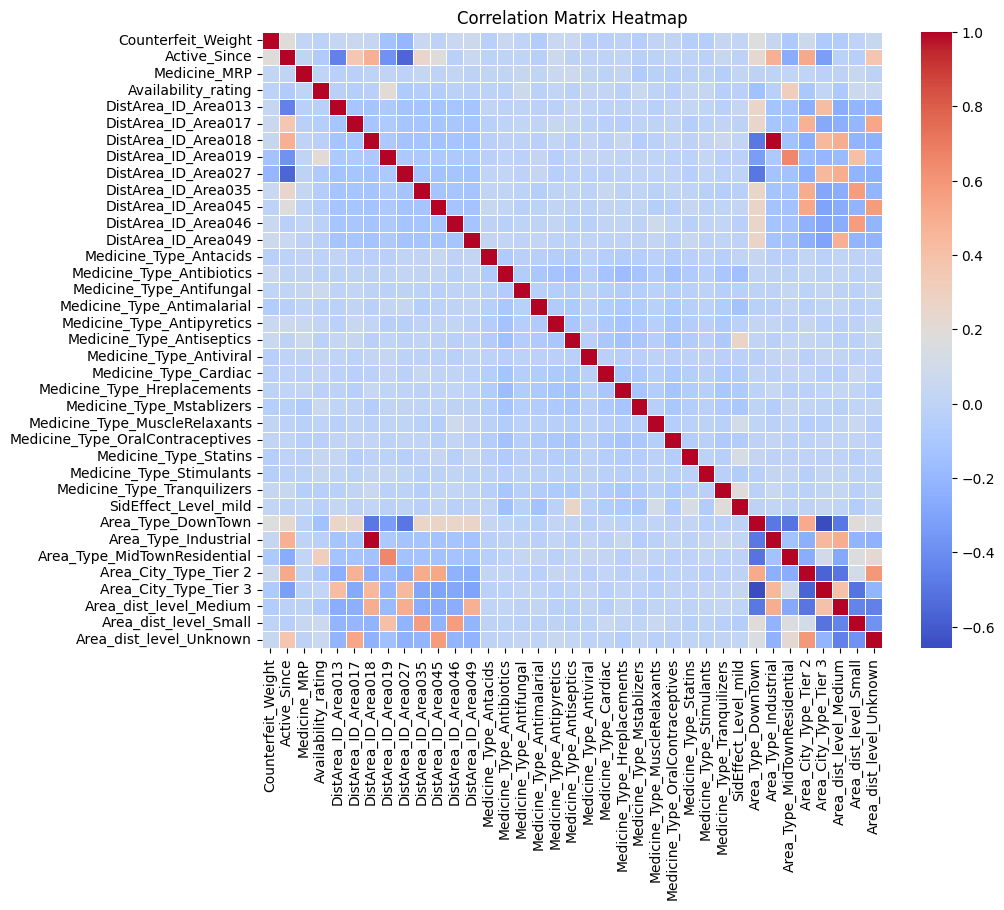

In [ ]:
# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dft_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# removing highly co related columns
columns_to_drop =['Area_Type_Industrial', 'Area_Type_DownTown'] # List the columns you want to drop
dft_filtered = dft_encoded.drop(columns=columns_to_drop, axis=1)


<ipython-input-105-3c1912e3b503>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dft_filtered.corr()


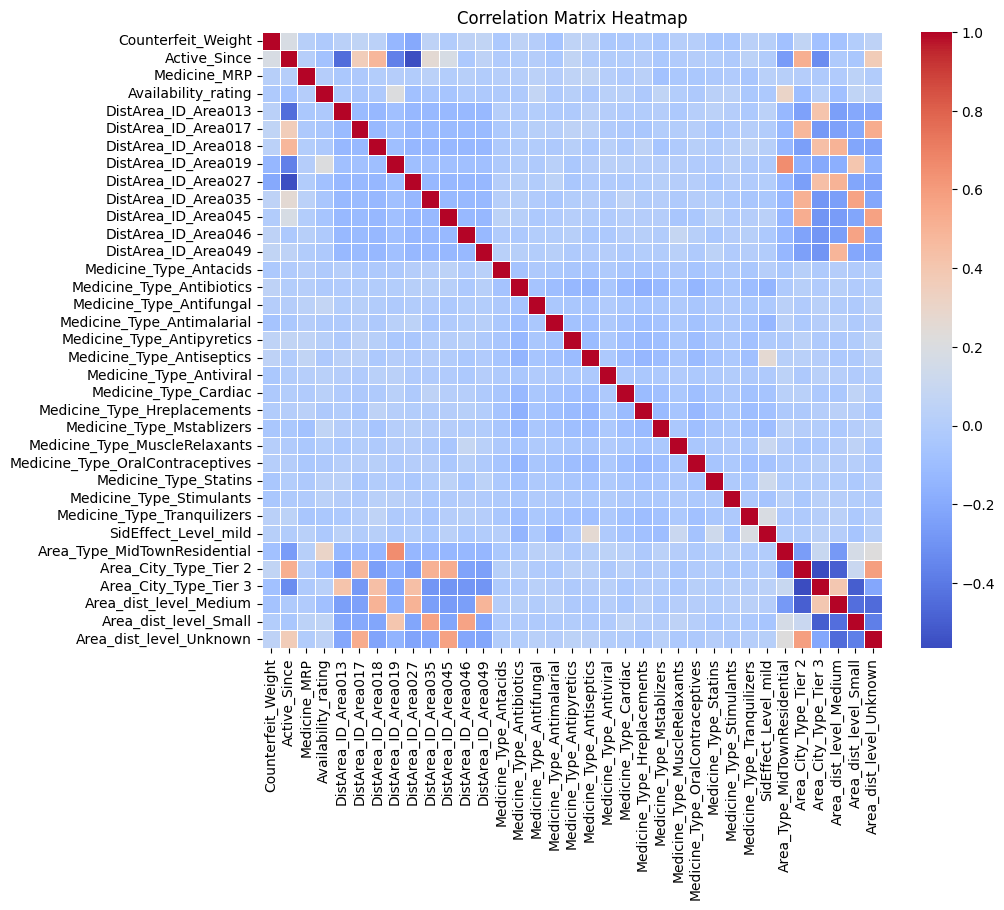

In [ ]:
# revisualising the corelation after removing 'Area_Type_Industrial' column
correlation_matrix = dft_filtered.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating'],
      dtype='object')


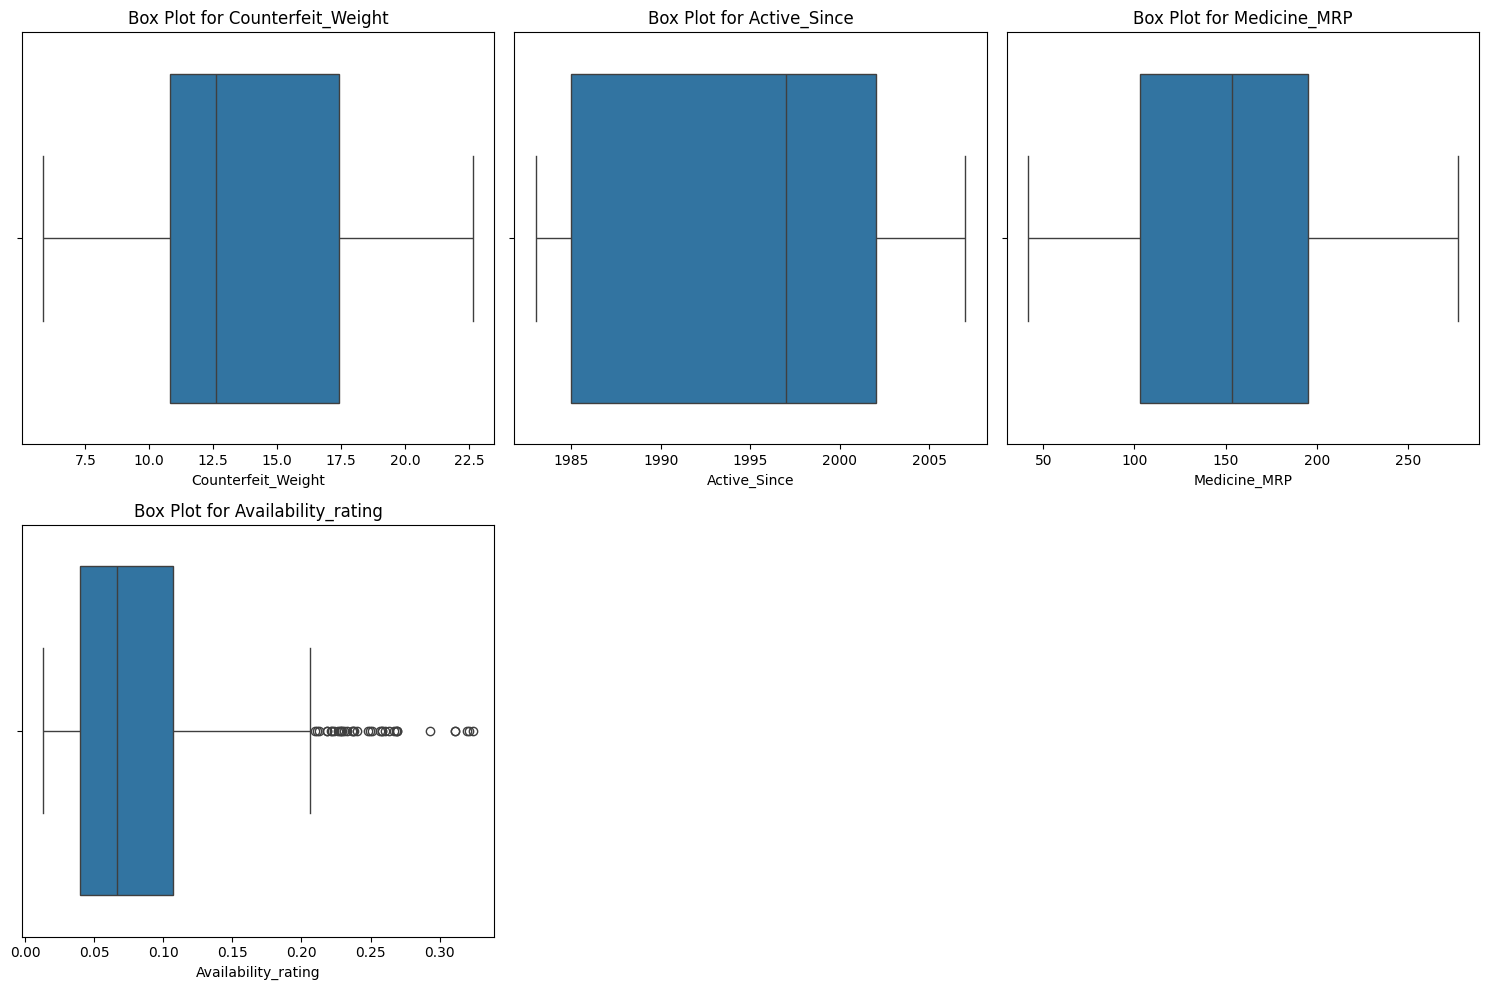

In [ ]:
# cretaing boxplot for identifying outliers


# Select numerical columns
numerical_columns = dft_filtered.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)
# Create box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dft_filtered[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming df_filtered is your DataFrame
columns_with_outliers = ['Availability_rating']

def remove_outliers(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.48* IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

# Remove outliers from specified columns
dft_filtered_no_outliers = remove_outliers(dft_filtered, columns_with_outliers)

# Display the shape before and after removing outliers
print("Shape before removing outliers:", dft_filtered.shape)
print("Shape after removing outliers:", dft_filtered_no_outliers.shape)



Shape before removing outliers: (1705, 36)
Shape after removing outliers: (1669, 36)


Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating'],
      dtype='object')


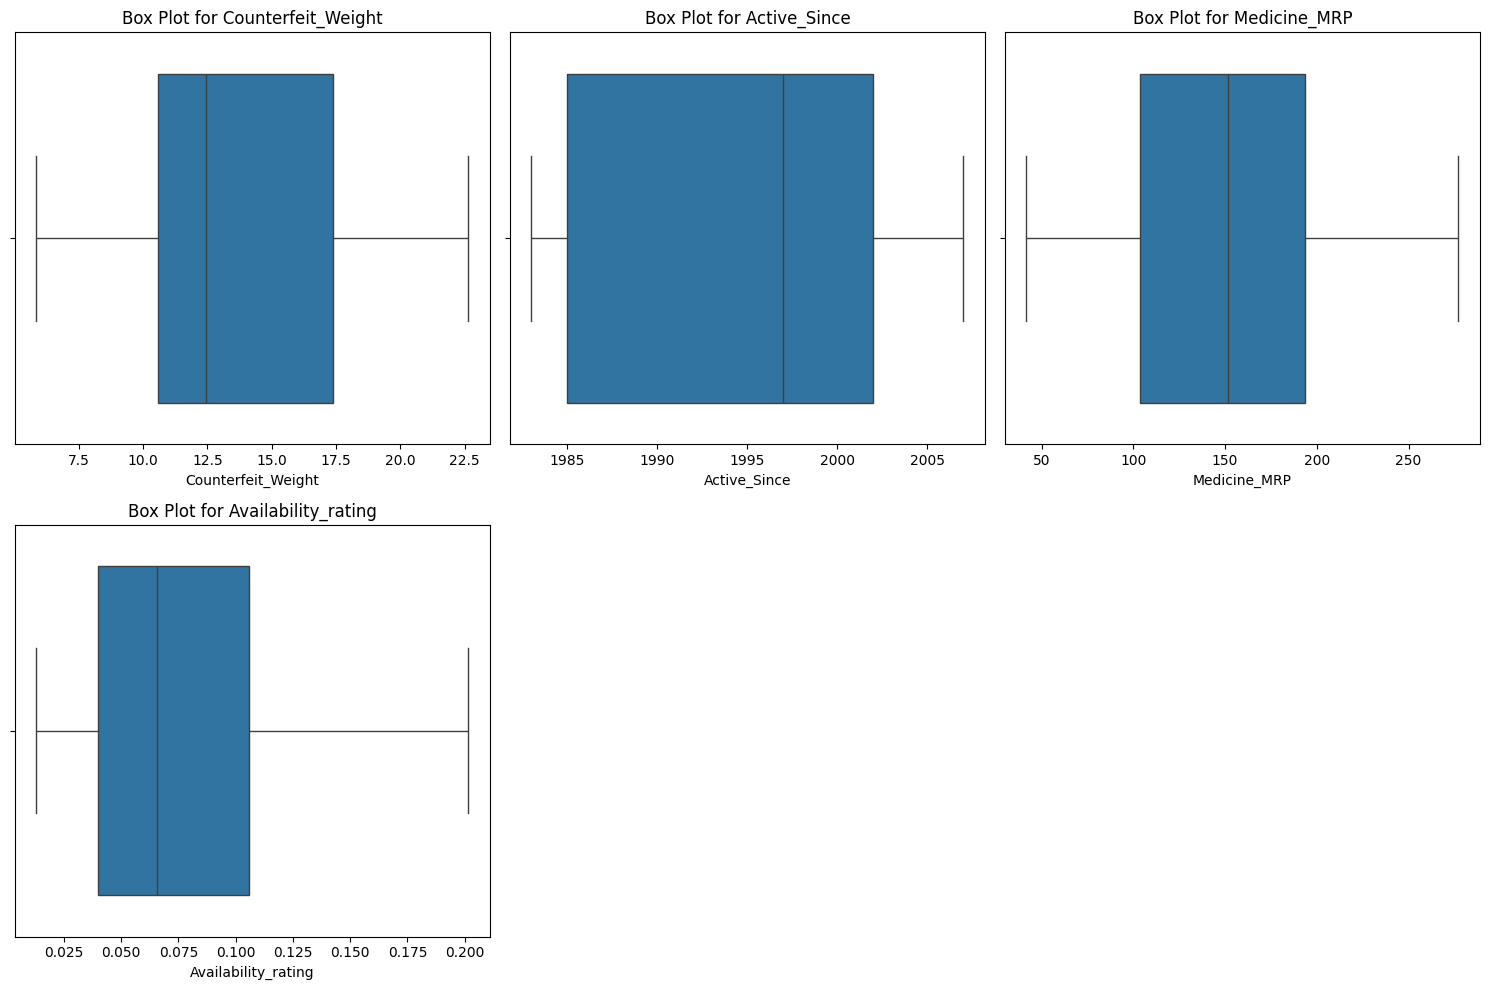

In [ ]:
numerical_columns = dft_filtered_no_outliers.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)
# Create box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):

    plt.subplot(2, 3, i)
    sns.boxplot(x=df_filtered_no_outliers[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
print(dft_filtered_no_outliers.columns)

Index(['Medicine_ID', 'Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating', 'DistArea_ID_Area013', 'DistArea_ID_Area017',
       'DistArea_ID_Area018', 'DistArea_ID_Area019', 'DistArea_ID_Area027',
       'DistArea_ID_Area035', 'DistArea_ID_Area045', 'DistArea_ID_Area046',
       'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild', 'Area_Type_MidTownResidential',
       'Area_City_Type_Tier 2', 'Area_City_Type_Tier 3',
       'Area_dist_level_Medium', 'Area_dist_level_Small',
  

In [ ]:
# Specify the columns to keep
columns_to_keep =['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating', 'DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 2',
       'Area_City_Type_Tier 3', 'Area_dist_level_Medium',
       'Area_dist_level_Small', 'Area_dist_level_Unknown']

# Keep only the specified columns
dft_filtered_selected = dft_filtered_no_outliers[columns_to_keep].copy()

# Display the first few rows of the resulting DataFrame
print(dft_filtered_selected.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0            11.40628          1983       85.5328             0.112747   
1            13.45000          2000      257.1460             0.144446   
2             7.10000          2000       98.1172             0.144221   
3            18.30000          1996      135.3730             0.100388   
4            11.40628          1983      112.8016             0.022585   

   DistArea_ID_Area013  DistArea_ID_Area017  DistArea_ID_Area018  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   DistArea_ID_Area019  DistArea_ID_Area027  DistArea_ID_Area035  ...  \
0                    0                    1                    0  ...   


# performing feature engineering


In [ ]:
dft_filtered_selected['Age'] = 2024 - dft_filtered_selected['Active_Since']
print(dft_filtered_selected.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 1704
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Counterfeit_Weight                1669 non-null   float64
 1   Active_Since                      1669 non-null   int64  
 2   Medicine_MRP                      1669 non-null   float64
 3   Availability_rating               1669 non-null   float64
 4   DistArea_ID_Area013               1669 non-null   uint8  
 5   DistArea_ID_Area017               1669 non-null   uint8  
 6   DistArea_ID_Area018               1669 non-null   uint8  
 7   DistArea_ID_Area019               1669 non-null   uint8  
 8   DistArea_ID_Area027               1669 non-null   uint8  
 9   DistArea_ID_Area035               1669 non-null   uint8  
 10  DistArea_ID_Area045               1669 non-null   uint8  
 11  DistArea_ID_Area046               1669 non-null   uint8  
 12  DistAr

In [ ]:
dft_filtered_selected['Product'] = dft_filtered_selected['Counterfeit_Weight'] * dft_filtered_selected['Medicine_MRP']
print(dft_filtered_selected.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 1704
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Counterfeit_Weight                1669 non-null   float64
 1   Active_Since                      1669 non-null   int64  
 2   Medicine_MRP                      1669 non-null   float64
 3   Availability_rating               1669 non-null   float64
 4   DistArea_ID_Area013               1669 non-null   uint8  
 5   DistArea_ID_Area017               1669 non-null   uint8  
 6   DistArea_ID_Area018               1669 non-null   uint8  
 7   DistArea_ID_Area019               1669 non-null   uint8  
 8   DistArea_ID_Area027               1669 non-null   uint8  
 9   DistArea_ID_Area035               1669 non-null   uint8  
 10  DistArea_ID_Area045               1669 non-null   uint8  
 11  DistArea_ID_Area046               1669 non-null   uint8  
 12  DistAr

In [ ]:
dft_filtered_selected['Interaction'] = dft_filtered_selected['Counterfeit_Weight'] * dft_filtered_selected['Availability_rating']
print(dft_filtered_selected.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0            11.40628          1983       85.5328             0.112747   
1            13.45000          2000      257.1460             0.144446   
2             7.10000          2000       98.1172             0.144221   
3            18.30000          1996      135.3730             0.100388   
4            11.40628          1983      112.8016             0.022585   

   DistArea_ID_Area013  DistArea_ID_Area017  DistArea_ID_Area018  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   DistArea_ID_Area019  DistArea_ID_Area027  DistArea_ID_Area035  ...  \
0                    0                    1                    0  ...   


In [ ]:
import numpy as np

# Assuming df_filtered_selected is your DataFrame
columns_to_transform = ['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating', 'DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 2',
       'Area_City_Type_Tier 3', 'Area_dist_level_Medium',
       'Area_dist_level_Small', 'Area_dist_level_Unknown']
# Apply logarithmic transformation to specified columns
dft_filtered_transformed = dft_filtered_selected.copy()
dft_filtered_transformed[columns_to_transform] = dft_filtered_selected[columns_to_transform].apply(np.log1p)

# Display the first few rows of the transformed DataFrame
print(dft_filtered_transformed.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0            2.518203      7.592870      4.460524             0.106832   
1            2.670694      7.601402      5.553525             0.134921   
2            2.091864      7.601402      4.596303             0.134724   
3            2.960105      7.599401      4.915394             0.095663   
4            2.518203      7.592870      4.734457             0.022334   

   DistArea_ID_Area013  DistArea_ID_Area017  DistArea_ID_Area018  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   DistArea_ID_Area019  DistArea_ID_Area027  DistArea_ID_Area035  ...  \
0             0.000000             0.693359                  0.0  ...   


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_filtered_transformed is your DataFrame
columns_to_scale = ['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating',  'Age', 'Product', 'Interaction']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to specified columns
dft_scaled = dft_filtered_transformed.copy()
dft_scaled[columns_to_scale] = scaler.fit_transform(dft_filtered_transformed[columns_to_scale])

# Display the first few rows of the scaled DataFrame
print(dft_scaled.head())


   Counterfeit_Weight  Active_Since  Medicine_MRP  Availability_rating  \
0           -0.459833     -1.551516     -0.971603             0.839636   
1            0.052628      0.484641      1.339941             1.510026   
2           -1.892581      0.484641     -0.684449             1.505344   
3            1.025217      0.007106     -0.009617             0.573049   
4           -0.459833     -1.551516     -0.392274            -1.177097   

   DistArea_ID_Area013  DistArea_ID_Area017  DistArea_ID_Area018  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   DistArea_ID_Area019  DistArea_ID_Area027  DistArea_ID_Area035  ...  \
0             0.000000             0.693359                  0.0  ...   


In [ ]:
Counterfiet_Sales = model.predict(dft_scaled)
print(Counterfiet_Sales)

[[-1.36886674e+12]
 [ 1.31424317e+12]
 [ 1.31424317e+12]
 ...
 [ 1.85556450e+12]
 [ 1.28074879e+12]
 [ 1.31424317e+12]]
